<a href="https://colab.research.google.com/github/RoyElkabetz/Q_Learning_course/blob/main/RL_run.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
## uncomment only if running from google.colab
# clone the git reposetory
!git clone https://github.com/RoyElkabetz/Q_Learning_course.git

# add path to .py files for import
import sys
sys.path.insert(1, "/content/Q_Learning_course")

Cloning into 'Q_Learning_course'...
remote: Enumerating objects: 32, done.
remote: Counting objects: 100% (32/32), done.
remote: Compressing objects: 100% (27/27), done.
remote: Total 32 (delta 6), reused 29 (delta 3), pack-reused 0
Unpacking objects: 100% (32/32), done.


In [6]:
!pip install gym

In [12]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from q_learning_agent import Agent
from tqdm.auto import tqdm

In [14]:

env = gym.make('FrozenLake-v0')
n_games = 500000
win_prc_list = []
scores = []
agent = Agent(lr=0.001, gamma=0.9, eps_start=1, eps_end=0.01, eps_dec=0.9999995, n_states=16, n_actions=4)

for i in tqdm(range(n_games)):
	done = False
	obs = env.reset()
	score = 0

	while not done:
		action = agent.choose_action(obs)
		obs_, reward, done, info = env.step(action)
		agent.learn(obs, action, reward, obs_)
		score += reward
		obs = obs_
	scores.append(score)

	if i % 100 == 0:
		win_prc = np.mean(scores[-100:])
		win_prc_list.append(win_prc)
	if i % 1000 == 0:
		print('| game: {:10d}| win_prc: {:2.2f} | epsilon: {:2.8f} |'.format(i, win_prc, agent.epsilon))
env.close()



| game:          0| win_prc: 0.00 | epsilon: 0.99998850 |
| game:       1000| win_prc: 0.04 | epsilon: 0.99628093 |
| game:       2000| win_prc: 0.01 | epsilon: 0.99252706 |
| game:       3000| win_prc: 0.01 | epsilon: 0.98877596 |
| game:       4000| win_prc: 0.01 | epsilon: 0.98494941 |
| game:       5000| win_prc: 0.04 | epsilon: 0.98110872 |
| game:       6000| win_prc: 0.01 | epsilon: 0.97728398 |
| game:       7000| win_prc: 0.01 | epsilon: 0.97349995 |
| game:       8000| win_prc: 0.02 | epsilon: 0.96967190 |
| game:       9000| win_prc: 0.01 | epsilon: 0.96605838 |
| game:      10000| win_prc: 0.03 | epsilon: 0.96227500 |
| game:      11000| win_prc: 0.01 | epsilon: 0.95837848 |
| game:      12000| win_prc: 0.00 | epsilon: 0.95448723 |
| game:      13000| win_prc: 0.02 | epsilon: 0.95077626 |
| game:      14000| win_prc: 0.02 | epsilon: 0.94700158 |
| game:      15000| win_prc: 0.01 | epsilon: 0.94321926 |
| game:      16000| win_prc: 0.00 | epsilon: 0.93963806 |
| game:      1

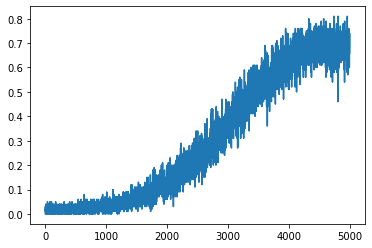

In [15]:
plt.figure()
plt.plot(win_prc_list)
plt.show()

In [16]:
agent.Q

{(0, 0): 0.0675733544202139,
 (0, 1): 0.06603540436278992,
 (0, 2): 0.06642333588472542,
 (0, 3): 0.05977763565973853,
 (1, 0): 0.037798728166500664,
 (1, 1): 0.04267016737290244,
 (1, 2): 0.04015745207531542,
 (1, 3): 0.06098630779116452,
 (2, 0): 0.07274236239055024,
 (2, 1): 0.06878373458901635,
 (2, 2): 0.07235436648812264,
 (2, 3): 0.056557416952640605,
 (3, 0): 0.02663652353765977,
 (3, 1): 0.028008856157023556,
 (3, 2): 0.022856636833925775,
 (3, 3): 0.05565945134922578,
 (4, 0): 0.0897410589776963,
 (4, 1): 0.07208926410035792,
 (4, 2): 0.062154438014694835,
 (4, 3): 0.04715351380216674,
 (5, 0): 0.0,
 (5, 1): 0.0,
 (5, 2): 0.0,
 (5, 3): 0.0,
 (6, 0): 0.10496506352624682,
 (6, 1): 0.0929940087408995,
 (6, 2): 0.11226040463812327,
 (6, 3): 0.022684407435580502,
 (7, 0): 0.0,
 (7, 1): 0.0,
 (7, 2): 0.0,
 (7, 3): 0.0,
 (8, 0): 0.07196423753193332,
 (8, 1): 0.11574251570239813,
 (8, 2): 0.104390919193007,
 (8, 3): 0.14173155831997586,
 (9, 0): 0.1545789144760952,
 (9, 1): 0.2439692

In [23]:
obs = env.reset()
done = False

while not done:
  env.render()
  action = agent.choose_action(obs)
  obs, reward, done, info = env.step(action)
print(reward)


SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Up)
SFFF
FHFH
FFFH
HFFG
  (Down)
SFFF
FHFH
FFFH
HFFG
  (Left)
SFFF
FHFH
FFFH
HFFG
1.0
